In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 37
np.random.seed(seed)
print(seed)

37


In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [7]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [8]:
cos = np.cos
sin = np.sin

In [9]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [10]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [11]:
n_grid = 50
range_min = 0
range_max = 10
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [12]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss


In [13]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 15618639.051826851
Current loss: 14993120.72857461
Current loss: 13930597.09912903
Current loss: 12376635.120389225
Current loss: 9557939.265094774
Current loss: 9474037.036894374
Current loss: 9341500.804022625
Current loss: 8496480.952199226
Current loss: 6430576.873525969
Current loss: 5841792.701229131
Current loss: 5834677.323712605
Current loss: 5823988.523570039
Current loss: 5806276.167111646
Current loss: 5625249.278552579
Current loss: 5615232.5896802815
Current loss: 5614942.369379642
Current loss: 4873527.362643034
Current loss: 3728725.126010109
Current loss: 3269300.8879426103
Current loss: 2820587.9146352704
Current loss: 2533702.4934628867
Current loss: 2264506.990059803
Current loss: 2219521.2988366247
Current loss: 2142931.22201883
Current loss: 2038487.0359158583
Current loss: 2004219.2770104883
Current loss: 1950404.1294816071
Current loss: 1876258.8592543656
Current loss: 1866679.8177196893
Current loss: 1852954.0544065535
Current loss: 1844295.634585

In [14]:
(376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01, 0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.017, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.42, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.42, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.277, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.277)
del1_target_values=[0.0626, 0.0779728455818338, 0.09281619393995905, 0.10673131190967008, 0.11975008149329716, 0.1319091089596631, 0.14324809006805758, 0.1538084770704075, 0.16363249561063564, 0.17276232171218334, 0.18123955072104456, 0.18910469432975557, 0.19639694991576742, 0.203153921729417, 0.20941149127234743, 0.2152037987684963, 0.2205631127591366, 0.2255198736824705, 0.23010274506164996, 0.2343386303746932, 0.23825267515998658, 0.2418684229773853, 0.24520785529701827, 0.24829148731534187, 0.25113833103485944, 0.25376612849958924, 0.2561913678063018, 0.25842936300362856, 0.2604943378538606, 0.2623993817850707, 0.26415669808832887, 0.265777606361797, 0.2672725386742682, 0.2686512434118774, 0.2699226365224925, 0.2710949334096879, 0.2721757912975189, 0.27317230923052205, 0.27409102807371477, 0.27493794024100787, 0.2757187233180483, 0.2764384596482839, 0.2771018472645109, 0.2777132702960928, 0.27827679896895957, 0.27879618960560837, 0.2792748846251031, 0.2797160461698837, 0.28012262359133905, 0.2804973072795233]
omega1_target_values=[1.0, 1.000199078777491, 1.0001868336161226, 1.0001749636253419, 1.000163542867578, 1.0001526211327025, 1.0001422291826556, 1.00013238296878, 1.0001230868849398, 1.0001143360832625, 1.0001061197727479, 1.0000984221202665, 1.0000912236047146, 1.0000845035087218, 1.0000782382296087, 1.000072404248558, 1.0000669783370801, 1.000061936595917, 1.0000572551416556, 1.0000529119007775, 1.0000488856612437, 1.0000451549243596, 1.0000416995120196, 1.0000385009140986, 1.0000355416229367, 1.000032804787455, 1.0000302738102342, 1.000027934459825, 1.0000257725951538, 1.000023775538579, 1.0000219312008127, 1.0000202280229744, 1.000018655223828, 1.000017203440139, 1.0000158634205996, 1.0000146268893706, 1.0000134860332555, 1.0000124335017015, 1.0000114624067988, 1.000010566584364, 1.0000097403269235, 1.0000089782699042, 1.0000082755593143, 1.000007627640018, 1.0000070302557345, 1.0000064794490384, 1.0000059715613596, 1.0000055032962176, 1.0000050716597513, 1.0000046737616586]
del2_target_values=[1.0567, 1.0328242262703533, 1.0085464134882487, 0.9846915516771484, 0.9614135168927435, 0.9388358775493152, 0.9170546706472688, 0.8961414071790949, 0.8761460212350646, 0.8570999455706048, 0.8390187719354131, 0.8219048979148862, 0.8057499644376614, 0.7905366291384551, 0.7762408274149052, 0.7628331557771766, 0.7502800440179387, 0.7385453501893957, 0.7275910553802386, 0.7173781106433839, 0.7078670094557513, 0.6990186302298941, 0.690794335512314, 0.6831564402578444, 0.6760683556647605, 0.6694949589026145, 0.6634026264278502, 0.6577592152626693, 0.6525342229303377, 0.647698814007131, 0.6432257538586995, 0.6390894087170019, 0.6352657482983254, 0.6317320833862032, 0.628467345510285, 0.6254518880393383, 0.6226672927125091, 0.6200963696393232, 0.6177231572996855, 0.6155328990424386, 0.6135115863240311, 0.6116465471845536, 0.609926010971967, 0.6083389681762542, 0.6068751704294202, 0.6055251305054918, 0.604280122320518, 0.6031321006006461, 0.6020735383851171, 0.6010975528223498]
omega2_target_values=[1.0, 0.9996824681002907, 0.9996868262501388, 0.9996933922071018, 0.9997017553047702, 0.9997115391476098, 0.9997224060301794, 0.9997340546646949, 0.9997462267410708, 0.9997586978086506, 0.9997712811168362, 0.9997838202978361, 0.9997961887335798, 0.9998082840862149, 0.9998200282659366, 0.9998313615613218, 0.9998422389648729, 0.9998526313970132, 0.9998625227285542, 0.9998719032108706, 0.999880769509262, 0.9998891294785547, 0.9998969944885767, 0.9999043770791339, 0.9999112920067182, 0.9999177578533502, 0.9999237988803775, 0.9999294323929853, 0.9999346810526044, 0.9999395642014395, 0.9999441024548803, 0.9999483180363457, 0.999952232960235, 0.9999558632142235, 0.9999592286198334, 0.9999623457532221, 0.9999652311220635, 0.9999679011655482, 0.9999703722543833, 0.9999726582254184, 0.9999747711459525, 0.999976724081556, 0.9999785281857222, 0.9999801941770659, 0.9999817323393243, 0.9999831525213572, 0.9999844641371458, 0.9999856751824381, 0.9999867922046661, 0.999987822900838]
del3_target_values=[0.9449, 0.9011622253524204, 0.8605413225117878, 0.8239284059261206, 0.7909775344791069, 0.761349384546351, 0.7347195498863006, 0.7107840272643886, 0.689262031125749, 0.669897393101103, 0.6524583331285304, 0.6367368612725859, 0.6225469752123097, 0.6097234729999754, 0.5981196877878441, 0.5876056168191183, 0.5780666568765038, 0.5694012494531998, 0.5615196710380467, 0.5543425045580095, 0.5477997003489317, 0.5418288170306933, 0.5363746022955932, 0.5313877141785572, 0.5268245775181378, 0.5226459091438879, 0.5188166260713784, 0.5153053265701402, 0.5120836893003927, 0.5091265106952738, 0.5064107763870161, 0.5039156545211719, 0.5016224851792644, 0.49951407532926745, 0.4975750484082601, 0.4957914562147918, 0.49415043864999464, 0.4926402237175833, 0.491250127523855, 0.4899705038217177, 0.4887922213587102, 0.48770722386000676, 0.48670810455543567, 0.4857879830127311, 0.4849405051375327, 0.4841598431733859, 0.48344069570174186, 0.4827782228889976, 0.4821678937540598, 0.4816056008516666]
omega3_target_values=[1.0, 0.99944448577873, 0.9994988201525286, 0.9995486640376402, 0.9995940315481661, 0.9996350716291375, 0.999672018228373, 0.9997051621330052, 0.9997348119227973, 0.9997612954551088, 0.9997849215598669, 0.9998059905567941, 0.9998247836710412, 0.9998415488008555, 0.9998565237433111, 0.9998699142087937, 0.9998818994865035, 0.999892644650199, 0.9999022977926537, 0.9999109811551612, 0.9999188019315451, 0.999925861340947, 0.9999322458342506, 0.9999380274125748, 0.9999432689334813, 0.9999480278758744, 0.9999523588366795, 0.9999563023429525, 0.9999598986711059, 0.9999631802582065, 0.9999661774428887, 0.9999689187952461, 0.9999714297506724, 0.9999737293285205, 0.9999758375970713, 0.9999777708292386, 0.9999795443694025, 0.9999811726334119, 0.9999826691085824, 0.9999840447904265, 0.999985309288223, 0.9999864722407962, 0.9999875417432692, 0.9999885254223623, 0.9999894304363938, 0.9999902634752799, 0.9999910307605342, 0.9999917374765792, 0.9999923878965024, 0.9999929868959316]

In [15]:
# import matplotlib.pyplot as plt

# # delta1_omega1
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# # delta2_omega2
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# # delta3_omega3
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# raise Exception

In [16]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

0.2804973072795233


Text(0.5, 1.0, 'Fitting Data')

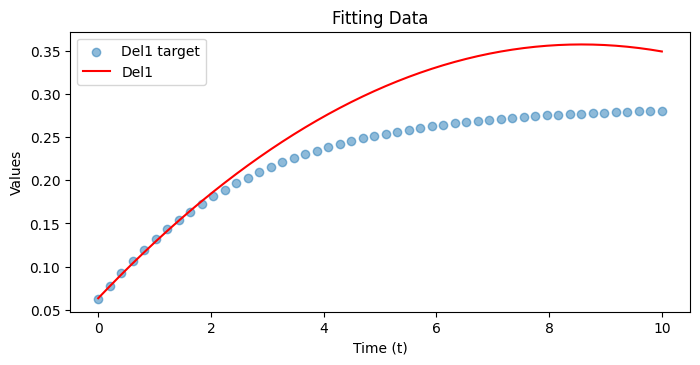

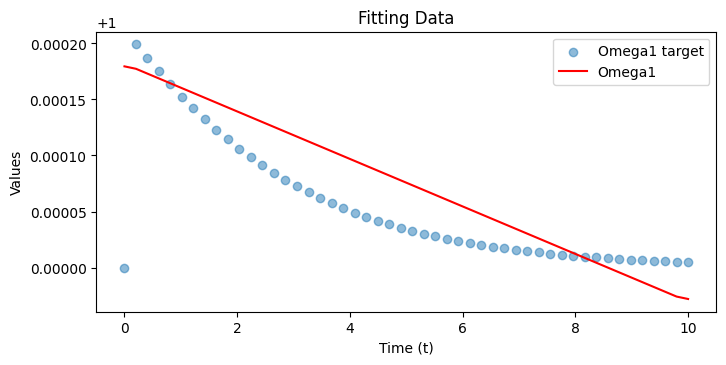

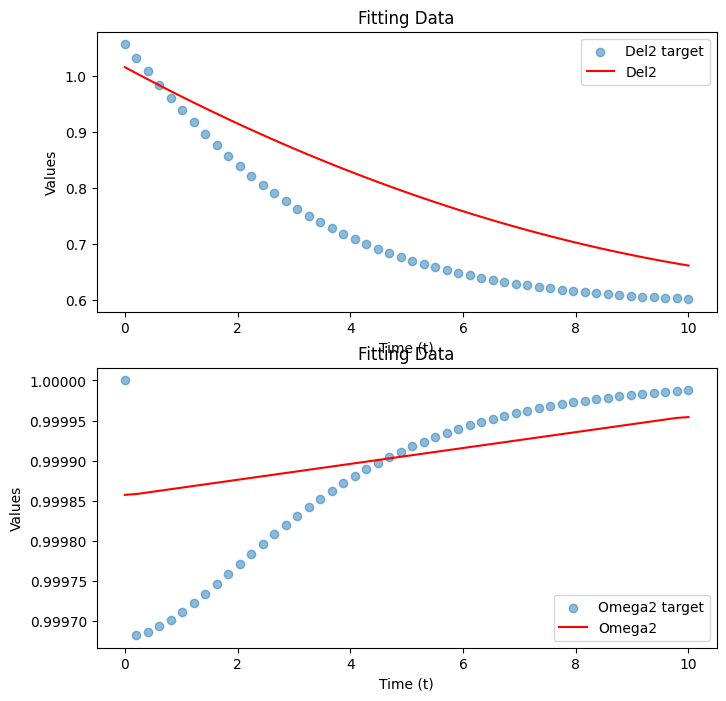

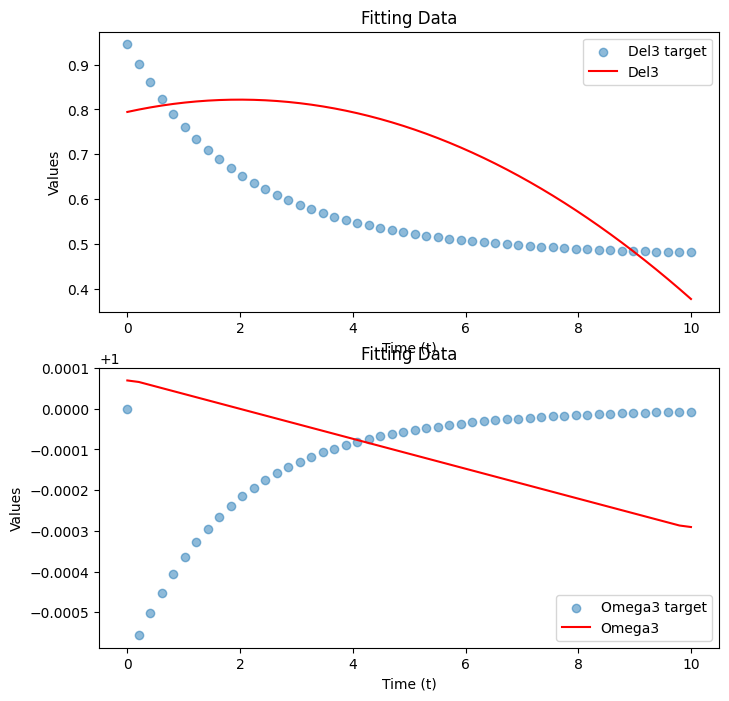

In [17]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))

# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

In [18]:
print('del1: ',del1_target_values[-1])
print('omega1: ',omega_pred1[-1])
print('delt2: ',del2_target_values[-1])
print('omega2: ',omega_pred2[-1])
print('del3: ',del3_target_values[-1])
print('omega3: ',omega_pred3[-1])


del1:  0.2804973072795233
omega1:  0.9999719397247009
delt2:  0.6010975528223498
omega2:  0.9999543202741491
del3:  0.4816056008516666
omega3:  0.9997095221101733
